./TestOriginal\BraTS2021_01665\BraTS2021_01665_t1.nii.gz


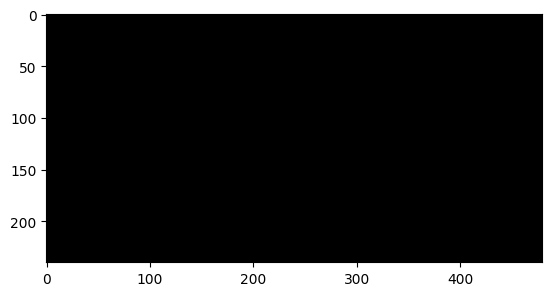

In [4]:
import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
paths=r'./TestOriginal/BraTS2021*'
path=glob.glob(paths)
N=0
for dic_path in path:
    img_path=glob.glob(dic_path+'/*t1*')[0]
    print(img_path)
    imgs1=sitk.GetArrayFromImage(sitk.ReadImage(img_path))
    img_path2=img_path.replace("t1", "t2")
    imgs2=sitk.GetArrayFromImage(sitk.ReadImage(img_path2))
    slices=imgs1.shape[0]
    for i in range(slices):
        img1=imgs1[i]
        img2=imgs2[i]
       
        img=np.zeros((img1.shape[0],2*img1.shape[1]))
        if img1.max()!=0:
            img1=img1/img1.max()
            img1=255*img1
        if img2.max()!=0:
            img2=img2/img2.max()
            img2=255*img2
        img[:,:img1.shape[1]]=img1
        img[:,img1.shape[1]:]=img2

        image_from_array = Image.fromarray(img.astype('uint8'))
        #mg=img/img.max()
        name='.\\test\\'+str(N)+'.jpg'
        image_from_array.save(name)
        N+=1
        #cv2.imwrite(name,img)
        #break
    plt.imshow(img,cmap='gray')
    #type(imgs)

In [4]:
import glob
import SimpleITK as sitk
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
def ComputingMSE(name):
    paths=glob.glob('./'+name+'/test_latest/images/*fake*')
    #print(paths)
    L2_sum=0
    for PathFake in paths:
        FakeImg=Image.open(PathFake)
        FakeImg=np.array(FakeImg)
        PathTrue=PathFake.replace('fake','real')
        TrueImg=Image.open(PathTrue)
        TrueImg=np.array(TrueImg)
        L2=((TrueImg-FakeImg)**2).mean()
        L2_sum+=L2
        #print(L2)
    print(name+' Mean L2:',L2_sum/len(paths))
        #print(TrueImgTrueImg.shape)
        #print(np.max(FakeImg))
ComputingMSE('SmallMRI_pix2pix_L2clT1T2')
ComputingMSE('SmallMRI_pix2pix_LIclT1T2')
ComputingMSE('SmallMRI_pix2pix_clT1T2')
ComputingMSE('MRI_pix2pix_L2clT1T2')
ComputingMSE('MRI_pix2pix_LIclT1T2')
ComputingMSE('MRI_pix2pix_clT1T2')

SmallMRI_pix2pix_L2clT1T2 Mean L2: 18.71207028343564
SmallMRI_pix2pix_LIclT1T2 Mean L2: 17.454466683523997
SmallMRI_pix2pix_clT1T2 Mean L2: 19.977814447312124
MRI_pix2pix_L2clT1T2 Mean L2: 20.607833534158686
MRI_pix2pix_LIclT1T2 Mean L2: 20.452311952652465
MRI_pix2pix_clT1T2 Mean L2: 18.214468613491263
